# ВВЕДЕНИЕ В SKLEARN
автор: Дьяконов Александр

базируется на

https://github.com/amueller/scipy_2015_sklearn_tutorial/tree/master/notebooks

In [12]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np


# для встроенных картинок
%pylab inline
# чуть покрасивше картинки:
pd.set_option('display.mpl_style', 'default')
figsize(8, 8)

import warnings
warnings.filterwarnings("ignore")

#plt.rcParams['figure.figsize'] = 10, 7.5
#plt.rcParams['axes.grid'] = True

Populating the interactive namespace from numpy and matplotlib


# Разбивка на обучение и контроль

In [117]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target

classifier = KNeighborsClassifier()

###### Просто перемешивание выборки

In [119]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)

#rng = np.random.RandomState(0)
#permutation = rng.permutation(len(X))
#X, y = X[permutation], y[permutation]

print(y)

[1 1 1 0 1 1 2 1 2 1 2 1 1 2 2 2 0 1 1 0 1 0 2 1 1 2 0 2 0 2 1 1 0 1 2 0 2
 2 0 0 2 1 1 2 2 2 2 0 1 0 1 1 0 2 0 1 0 2 0 0 0 1 2 0 0 1 0 2 0 1 2 0 1 0
 1 1 2 0 1 1 1 1 2 2 2 2 0 1 0 2 2 0 1 2 0 0 1 2 0 1 0 2 0 2 0 2 0 2 0 2 2
 1 2 1 2 0 2 0 2 1 2 1 2 2 1 0 0 1 2 2 0 0 1 2 1 2 1 1 0 1 1 0 1 0 0 0 0 0
 2 0]


###### Разбивка встроенными средствами

In [231]:
from sklearn.cross_validation import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=1999)
print("Labels for training and testing data")
print(train_y)
print(test_y)

classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)
print("Fraction Correct")
print(np.sum(pred_y == test_y) / float(len(test_y)))

Labels for training and testing data
[0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0
 1 1 0 1 0 0 0 0 1 0 0 0 0]
[0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 1 1 1 1 0 0 1]
Fraction Correct
0.94


# Встроенные датасеты

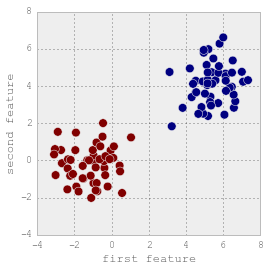

In [234]:
from sklearn.datasets import make_blobs
plt.rcParams['figure.figsize'] = 4, 4
X, y = make_blobs(centers=2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=75)
plt.xlabel("first feature")
plt.ylabel("second feature")

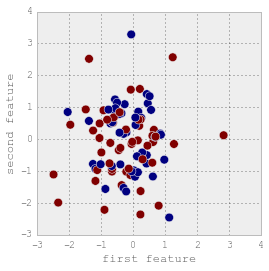

In [236]:
from sklearn.datasets import make_classification

X, y = make_classification(100)
plt.scatter(X[:, 0], X[:, 1], c=y, s=75)
plt.xlabel("first feature")
plt.ylabel("second feature")

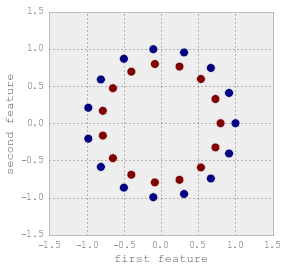

In [240]:
from sklearn.datasets import make_circles

X, y = make_circles(30)
plt.scatter(X[:, 0], X[:, 1], c=y, s=75)
plt.xlabel("first feature")
plt.ylabel("second feature")

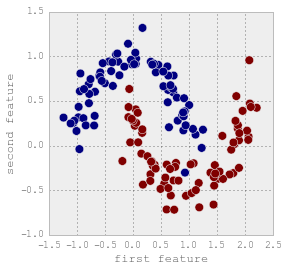

In [256]:
from sklearn.datasets import make_moons
X, y = make_moons(150, noise=0.15)
plt.scatter(X[:, 0], X[:, 1], c=y, s=75)
plt.xlabel("first feature")
plt.ylabel("second feature")

# Классификация: логистическая регрессия

(100, 2)
(100,)
[[ 4.22  2.23]
 [ 0.91  0.46]
 [-0.28  5.08]
 [ 0.09  2.32]
 [ 3.24  1.21]]
[1 1 0 0 1]


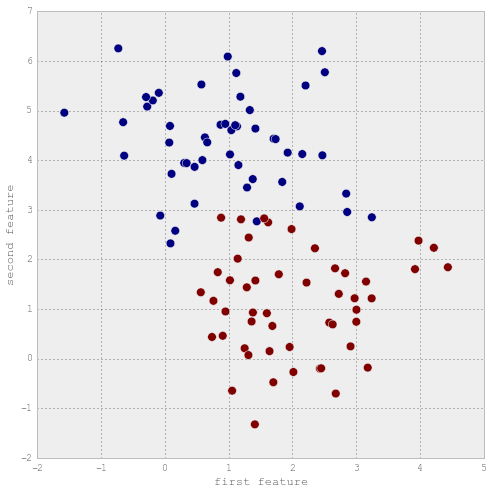

In [284]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, random_state=0)
print(X.shape)
print(y.shape)
print(X[:5, :])
print(y[:5])
plt.scatter(X[:, 0], X[:, 1], c=y, s=75)
plt.xlabel("first feature")
plt.ylabel("second feature")

In [288]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [289]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

In [290]:
print (np.mean(prediction == y_test))
print (classifier.score(X_test, y_test)) # более удобная функция
print (classifier.score(X_train, y_train))

0.8
0.8
0.933333333333


In [105]:
import numpy as np
import matplotlib.pyplot as plt


def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0 #X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, colors=['cyan', 'pink'])
    if line:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

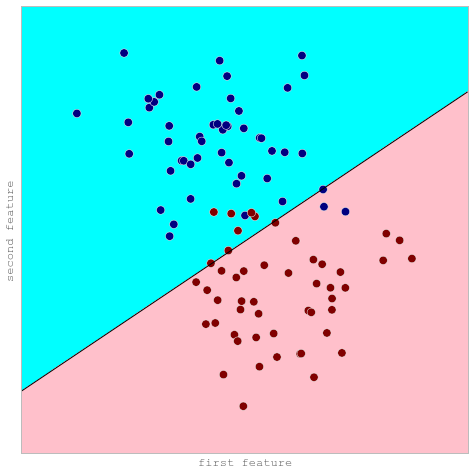

In [291]:
plt.rcParams['figure.figsize'] = 8, 8

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(classifier, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

[[12  1]
 [ 4  8]]


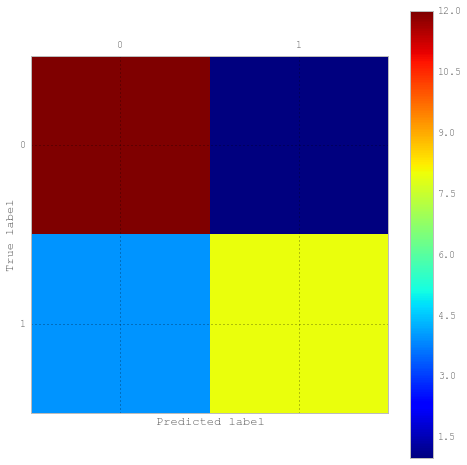

In [292]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, prediction))
plt.matshow(confusion_matrix(y_test, prediction))
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [293]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.89      0.67      0.76        12

avg / total       0.82      0.80      0.80        25



# Классификация: Ближайший сосед

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')
0.92


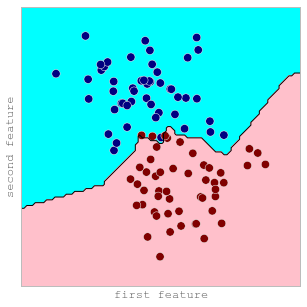

In [297]:
plt.rcParams['figure.figsize'] = 5, 5

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print (knn)
print (knn.score(X_test, y_test))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

# Классификация: Дерево

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')
0.88


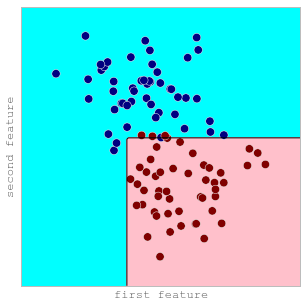

In [295]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train, y_train)

print (tree)
print (tree.score(X_test, y_test))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(tree, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

# Классификация: случайный лес

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.92


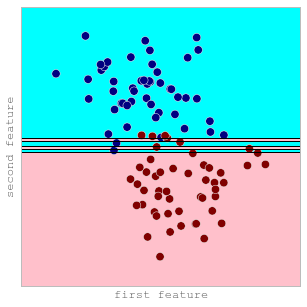

In [308]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1)
rf.fit(X_train, y_train)

print (rf)
print (rf.score(X_test, y_test))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(rf, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.88


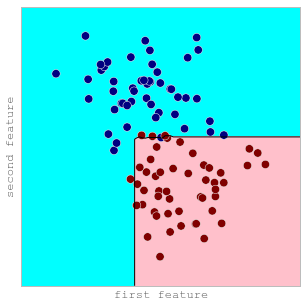

In [307]:
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train, y_train)

print (rf)
print (rf.score(X_test, y_test))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(rf, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.92


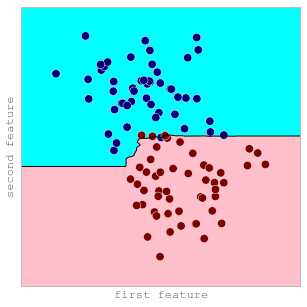

In [306]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

print (rf)
print (rf.score(X_test, y_test))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(rf, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

# Классификация: SVM + ROC-кривые

(100, 2)
(100,)
[[ 2.63  0.69]
 [ 0.08  4.69]
 [ 3.    0.74]
 [-0.64  4.09]
 [-0.07  2.88]]
[1 0 1 0 0]


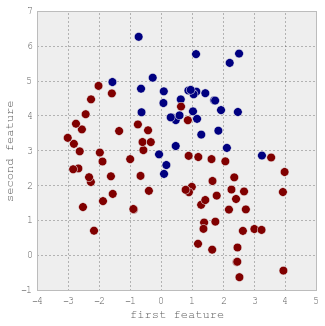

In [309]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
X, y = make_blobs(centers=3, random_state=0)
y[y>1] = 1
print(X.shape)
print(y.shape)
print(X[:5, :])
print(y[:5])
plt.scatter(X[:, 0], X[:, 1], c=y, s=75)
plt.xlabel("first feature")
plt.ylabel("second feature")


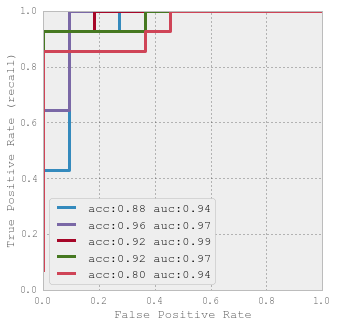

In [310]:
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

for gamma in [.01, .05, 1, 2, 5]:
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (recall)")
    svm = SVC(gamma=gamma).fit(X_train, y_train)
    decision_function = svm.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, decision_function)
    acc = svm.score(X_test, y_test)
    auc = roc_auc_score(y_test, svm.decision_function(X_test))
    plt.plot(fpr, tpr, label="acc:%.2f auc:%.2f" % (acc, auc), linewidth=3)
plt.legend(loc="best")

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=5,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.8


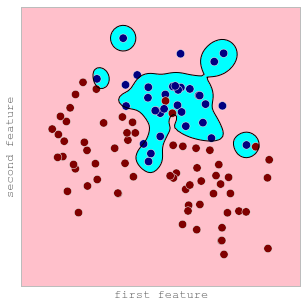

In [311]:
svm = SVC(gamma=gamma)
svm.fit(X_train, y_train)

print (svm)
print (svm.score(X_test, y_test))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(svm, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.92


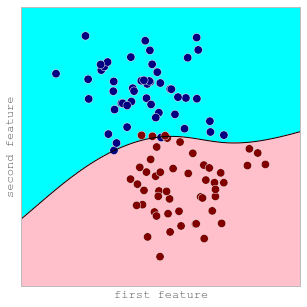

In [303]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)

print (svm)
print (svm.score(X_test, y_test))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(svm, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.92


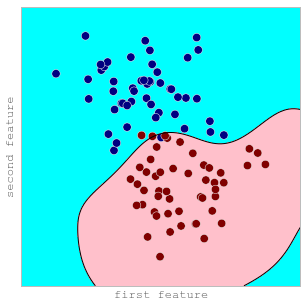

In [304]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

print (svm)
print (svm.score(X_test, y_test))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(svm, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.4


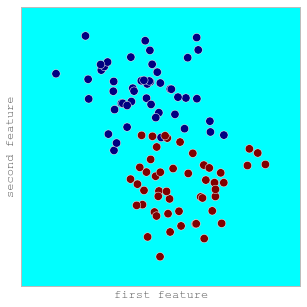

In [305]:
from sklearn.svm import SVC
svm = SVC(kernel='sigmoid')
svm.fit(X_train, y_train)

print (svm)
print (svm.score(X_test, y_test))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(svm, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

# Регрессия: линейная

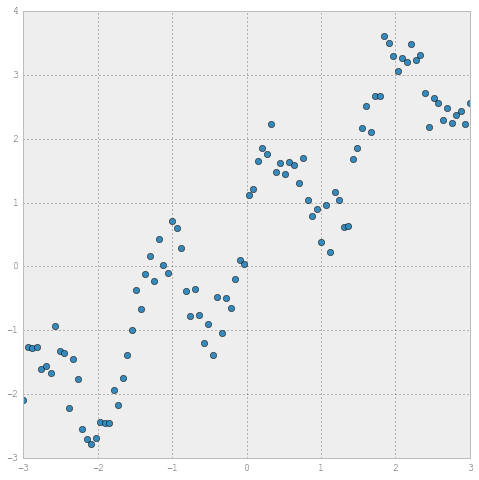

In [19]:
x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))
plt.plot(x, y, 'o')

чтобы применять регрессию надо получить 2d-массив!

In [20]:
print(x.shape)
X = x[:, np.newaxis]
print(X.shape)

(100,)
(100, 1)


In [21]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
y_pred_train = regressor.predict(X_train)

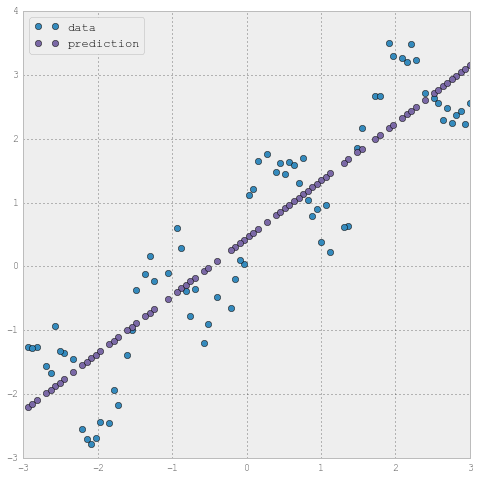

In [23]:
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.legend(loc='best')

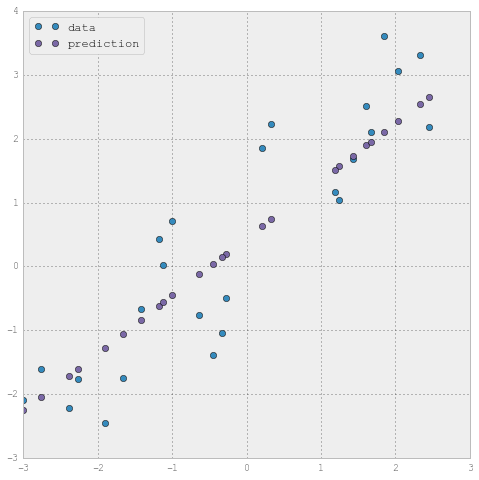

In [24]:
y_pred_test = regressor.predict(X_test)
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.legend(loc='best')


In [28]:
print (regressor.score(X_test, y_test))
print (regressor.score(X_train, y_train))

0.799432140508
0.818919077535


# Регрессия: kNN

In [67]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          n_neighbors=1, p=2, weights='uniform')

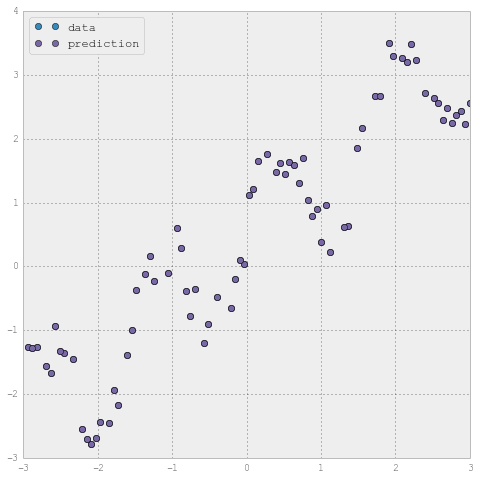

In [68]:
y_pred_train = kneighbor_regression.predict(X_train)

plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.legend(loc='best')

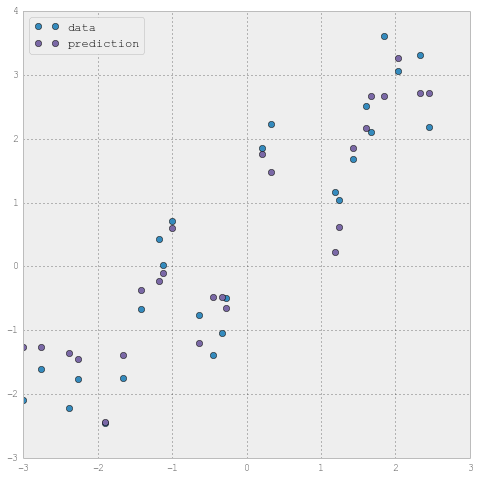

In [69]:
y_pred_test = kneighbor_regression.predict(X_test)

plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.legend(loc='best')

In [70]:
kneighbor_regression.score(X_test, y_test)

0.91662930224679484

Кстати, лучше, чем было!

# Нормировка данных

In [313]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)

(150, 4)


In [314]:
print("mean : %s " % X.mean(axis=0))
print("standard deviation : %s " % X.std(axis=0))

mean : [ 5.84  3.05  3.76  1.2 ] 
standard deviation : [ 0.83  0.43  1.76  0.76] 


In [315]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [316]:
print("mean : %s " % X_scaled.mean(axis=0))
print("standard deviation : %s " % X_scaled.std(axis=0))

mean : [ -1.69e-15  -1.64e-15  -1.48e-15  -1.62e-15] 
standard deviation : [ 1.  1.  1.  1.] 


# Перокодировка

In [323]:
f = ['a','bb',20,'bb','a','a']
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(f)
encoder.transform(f)

array([1, 2, 0, 2, 1, 1], dtype=int64)

In [326]:
f = ['a','bb','c','bb','a','a']
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
encoder.fit(f)
encoder.transform(f)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [334]:
f = [[1,2],[1,1],[2,2]]
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(f)
encoder.transform(f).todense()

matrix([[ 1.,  0.,  0.,  1.],
        [ 1.,  0.,  1.,  0.],
        [ 0.,  1.,  0.,  1.]])

# Полиномиальные признаки

In [337]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
f = [[1,0],[2,1],[3,2]]
pf.fit(f)
pf.transform(f)

array([[1, 1, 0, 1, 0, 0],
       [1, 2, 1, 4, 2, 1],
       [1, 3, 2, 9, 6, 4]])

# PCA

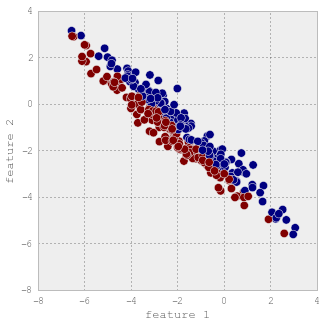

In [8]:
plt.rcParams['figure.figsize'] = 5, 5

rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)
y = X_[:, 0] > 0
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y, s=70) # , linewidths=0
plt.xlabel("feature 1")
plt.ylabel("feature 2")

In [4]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_blob)
X_pca = pca.transform(X_blob)

C:\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


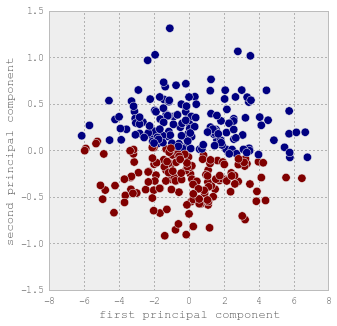

In [7]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=70) # linewidths=1, 
plt.xlabel("first principal component")
plt.ylabel("second principal component")

# Сокращение размерности

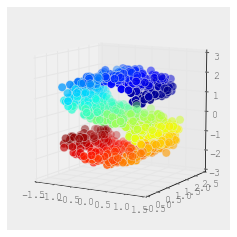

In [23]:
plt.rcParams['figure.figsize'] = 4, 4

from sklearn.datasets import make_s_curve
X, y = make_s_curve(n_samples=1000, noise=0.1)

from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y, s=70)
ax.view_init(10, -60)

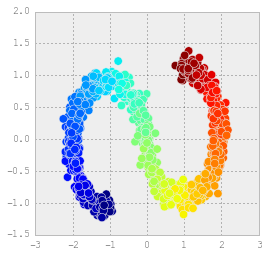

In [24]:
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=70)

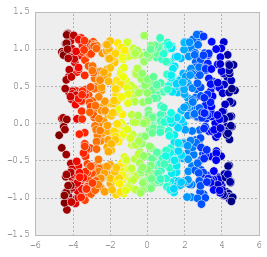

In [25]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=15, n_components=2)
X_iso = iso.fit_transform(X)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y, s=70)

# Кластеризация

(100, 2)

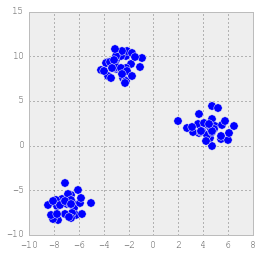

In [26]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=70)
X.shape

[[ 4.49951001  1.93892013]
 [-6.95170962 -6.67621669]
 [-2.66780392  8.93576069]]


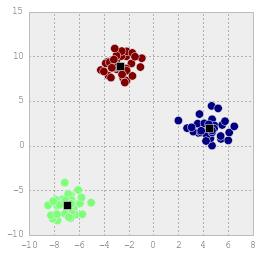

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=70)

mu = kmeans.cluster_centers_
plt.scatter(mu[:,0], mu[:,1], s=50, c='black', marker='s')
print(mu)

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y, labels))
print(confusion_matrix(y, labels))

0.0
[[ 0  0 34]
 [33  0  0]
 [ 0 33  0]]


In [92]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, labels)

1.0

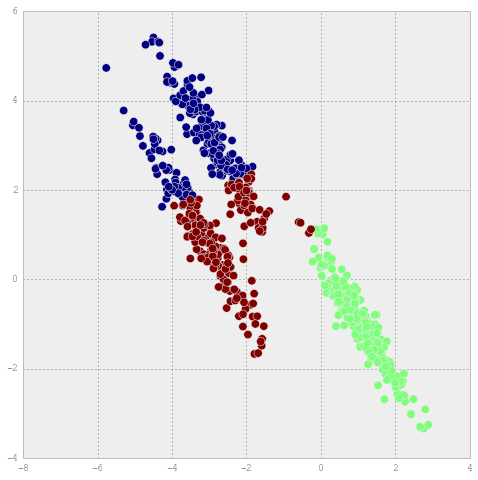

In [94]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

y_pred = KMeans(n_clusters=3).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=70)

# Работа с текстами

In [158]:
X = ["Some say the world will end in fire,",
     "Some say in ice."]

In [159]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X)
vectorizer.vocabulary_

{'end': 0,
 'fire': 1,
 'ice': 2,
 'in': 3,
 'say': 4,
 'some': 5,
 'the': 6,
 'will': 7,
 'world': 8}

In [160]:
X_bag_of_words = vectorizer.transform(X) # sparse-матрица
X_bag_of_words.toarray()

array([[1, 1, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 0, 0, 0]], dtype=int64)

In [161]:
vectorizer.get_feature_names()

['end', 'fire', 'ice', 'in', 'say', 'some', 'the', 'will', 'world']

In [162]:
vectorizer.inverse_transform(X_bag_of_words)

[array(['end', 'fire', 'in', 'say', 'some', 'the', 'will', 'world'], 
       dtype='<U5'), array(['ice', 'in', 'say', 'some'], 
       dtype='<U5')]

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [164]:
import numpy as np
np.set_printoptions(precision=2)

print(tfidf_vectorizer.transform(X).toarray())

[[ 0.39  0.39  0.    0.28  0.28  0.28  0.39  0.39  0.39]
 [ 0.    0.    0.63  0.45  0.45  0.45  0.    0.    0.  ]]


In [165]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2)) # от какого до какого ранга
bigram_vectorizer.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [166]:
bigram_vectorizer.get_feature_names()

['end',
 'end in',
 'fire',
 'ice',
 'in',
 'in fire',
 'in ice',
 'say',
 'say in',
 'say the',
 'some',
 'some say',
 'the',
 'the world',
 'will',
 'will end',
 'world',
 'world will']

In [167]:
bigram_vectorizer.transform(X).toarray()

array([[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0]], dtype=int64)

###### другая векторизация

In [270]:
X = ['This is spam', 'I am spamer', 'I like spam', 'We love spams', 'To be or not to be', 'Let it be']
y = [1,1,1,1,0,0]

In [271]:
from sklearn.cross_validation import train_test_split
text_train, text_test, y_train, y_test = train_test_split(X, y)

In [272]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

vectorizer = TfidfVectorizer()
vectorizer.fit(text_train)

X_train = vectorizer.transform(text_train)
X_test = vectorizer.transform(text_test)

clf = LogisticRegression()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.5

##### Pipeline

In [273]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression())
pipeline.fit(text_train, y_train)
pipeline.score(text_test, y_test)

0.5

In [ ]:
# оптимизация параметров

from sklearn.grid_search import GridSearchCV

pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression())

params = {'logisticregression__C': [.1, 1, 10, 100],
          "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (2, 2)]}
grid = GridSearchCV(pipeline, param_grid=params, cv=5)
grid.fit(text_train, y_train)
print(grid.best_params_)
grid.score(text_test, y_test)

# Проверка моделей

(100, 2)
(100,)
[[ 4.22  2.23]
 [ 0.91  0.46]
 [-0.28  5.08]
 [ 0.09  2.32]
 [ 3.24  1.21]]
[1 1 0 0 1]


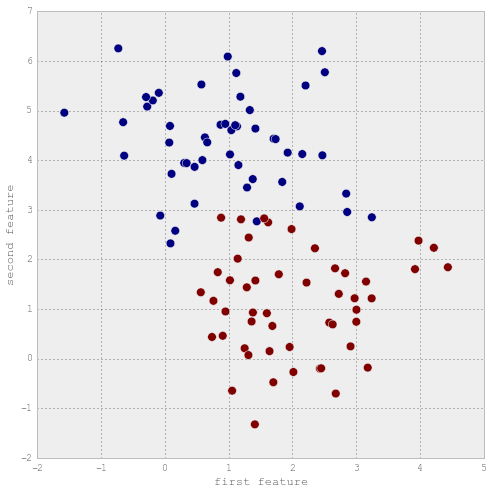

In [229]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, random_state=0)
print(X.shape)
print(y.shape)
print(X[:5, :])
print(y[:5])
plt.scatter(X[:, 0], X[:, 1], c=y, s=75)
plt.xlabel("first feature")
plt.ylabel("second feature")

In [94]:
from sklearn.cross_validation import cross_val_score

logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y)
print(scores)
print(np.mean(scores))

[ 0.97058824  0.79411765  0.96875   ]
0.911151960784


In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X, y)
print(scores)
print(np.mean(scores))

[ 0.97058824  0.88235294  0.9375    ]
0.930147058824


In [96]:
cross_val_score(knn, X, y, cv=5)

array([ 0.95,  0.9 ,  1.  ,  0.95,  0.95])

In [97]:
cross_val_score(logreg, X, y, cv=5)

array([ 1.  ,  0.9 ,  0.85,  0.85,  1.  ])

In [101]:
from sklearn.metrics.scorer import SCORERS

# какие скореры есть
print(SCORERS.keys())

# пишем свой скорер
def my_accuracy_scoring(est, X, y):
    return np.mean(est.predict(X) == y)

cross_val_score(knn, X, y, scoring=my_accuracy_scoring, cv=5)

dict_keys(['mean_squared_error', 'log_loss', 'f1_macro', 'precision', 'precision_weighted', 'precision_samples', 'average_precision', 'recall_micro', 'f1_micro', 'accuracy', 'mean_absolute_error', 'recall_weighted', 'recall', 'f1_weighted', 'median_absolute_error', 'adjusted_rand_score', 'f1_samples', 'precision_macro', 'recall_samples', 'r2', 'f1', 'recall_macro', 'precision_micro', 'roc_auc'])


array([ 0.95,  0.9 ,  1.  ,  0.95,  0.95])

###### Как использовать разбиение для контроля

In [230]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import ShuffleSplit

cv = ShuffleSplit(len(y), n_iter=5, test_size=.2)
cross_val_score(logreg, X, y, cv=cv)

array([ 0.85,  1.  ,  0.9 ,  0.95,  1.  ])

###### Разбиения выборок: sklearn.cross_validation

In [225]:
from sklearn.cross_validation import StratifiedKFold
# когда дисбаланс классов
y = np.array([1,1,2,2,2,2,3,3,3,3,3,3])
cv = StratifiedKFold(y, n_folds=2)
print(cv)

for train, test in cv:
    print('индексы теста = ' + str(test))
    print('классы теста = ' + str(y[test]))

sklearn.cross_validation.StratifiedKFold(labels=[1 1 2 2 2 2 3 3 3 3 3 3], n_folds=2, shuffle=False, random_state=None)
индексы теста = [0 2 3 6 7 8]
классы теста = [1 2 2 3 3 3]
индексы теста = [ 1  4  5  9 10 11]
классы теста = [1 2 2 3 3 3]


In [222]:
from sklearn.cross_validation import KFold
for train, test in KFold(12,2):
    print('индексы теста = ' + str(test))
    print('классы теста = ' + str(y[test]))    

индексы теста = [0 1 2 3 4 5]
классы теста = [1 1 2 2 2 2]
индексы теста = [ 6  7  8  9 10 11]
классы теста = [3 3 3 3 3 3]


In [223]:
from sklearn.cross_validation import LeaveOneOut # KFold(n, n_folds=n)
for train, test in LeaveOneOut(12):
    print('индексы теста = ' + str(test))
    print('классы теста = ' + str(y[test]))

индексы теста = [0]
классы теста = [1]
индексы теста = [1]
классы теста = [1]
индексы теста = [2]
классы теста = [2]
индексы теста = [3]
классы теста = [2]
индексы теста = [4]
классы теста = [2]
индексы теста = [5]
классы теста = [2]
индексы теста = [6]
классы теста = [3]
индексы теста = [7]
классы теста = [3]
индексы теста = [8]
классы теста = [3]
индексы теста = [9]
классы теста = [3]
индексы теста = [10]
классы теста = [3]
индексы теста = [11]
классы теста = [3]


In [224]:
from sklearn.cross_validation import LeavePOut
for train, test in LeavePOut(12,3):
    print('индексы теста = ' + str(test))
    print('классы теста = ' + str(y[test]))

индексы теста = [0 1 2]
классы теста = [1 1 2]
индексы теста = [0 1 3]
классы теста = [1 1 2]
индексы теста = [0 1 4]
классы теста = [1 1 2]
индексы теста = [0 1 5]
классы теста = [1 1 2]
индексы теста = [0 1 6]
классы теста = [1 1 3]
индексы теста = [0 1 7]
классы теста = [1 1 3]
индексы теста = [0 1 8]
классы теста = [1 1 3]
индексы теста = [0 1 9]
классы теста = [1 1 3]
индексы теста = [ 0  1 10]
классы теста = [1 1 3]
индексы теста = [ 0  1 11]
классы теста = [1 1 3]
индексы теста = [0 2 3]
классы теста = [1 2 2]
индексы теста = [0 2 4]
классы теста = [1 2 2]
индексы теста = [0 2 5]
классы теста = [1 2 2]
индексы теста = [0 2 6]
классы теста = [1 2 3]
индексы теста = [0 2 7]
классы теста = [1 2 3]
индексы теста = [0 2 8]
классы теста = [1 2 3]
индексы теста = [0 2 9]
классы теста = [1 2 3]
индексы теста = [ 0  2 10]
классы теста = [1 2 3]
индексы теста = [ 0  2 11]
классы теста = [1 2 3]
индексы теста = [0 3 4]
классы теста = [1 2 2]
индексы теста = [0 3 5]
классы теста = [1 2 2]
и

In [228]:
from sklearn.cross_validation import ShuffleSplit
for train, test in ShuffleSplit(12, 3):
    print('индексы теста = ' + str(test))
    print('классы теста = ' + str(y[test]))

индексы теста = [11  0]
классы теста = [3 1]
индексы теста = [2 4]
классы теста = [2 2]
индексы теста = [0 1]
классы теста = [1 1]


cross_validation.train_test_split - от матрицы

cross_validation.cross_val_score - оценка с помощью CV

cross_validation.cross_val_predict - формирование cv-метапризнаков

# Настройка параметров

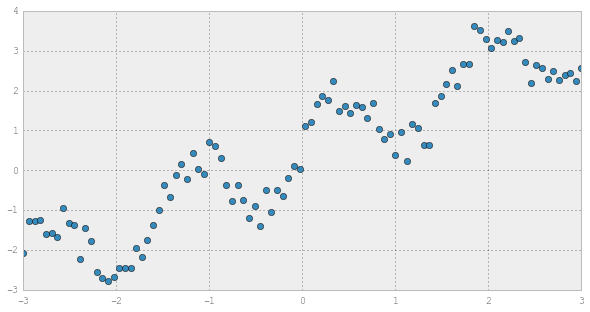

In [266]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = 10, 5

x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))
plt.plot(x, y, 'o')

X = x[:, np.newaxis]

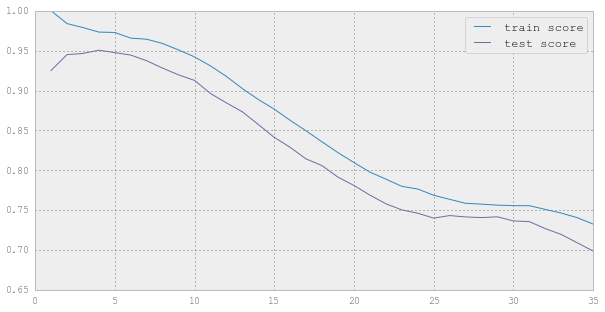

In [264]:
from sklearn.learning_curve import validation_curve
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsRegressor

cv = KFold(n=len(x), shuffle=True)
n_neighbors = [i+1 for i in range(35)] # [1, 3, 5, 10, 20, 50]
train_errors, test_errors = validation_curve(KNeighborsRegressor(), X, y, param_name="n_neighbors",
                                             param_range=n_neighbors, cv=cv)
plt.plot(n_neighbors, train_errors.mean(axis=1), label="train score")
plt.plot(n_neighbors, test_errors.mean(axis=1), label="test score")
plt.legend(loc="best")

[-0.65 -0.65 -0.64 -0.62 -0.61]


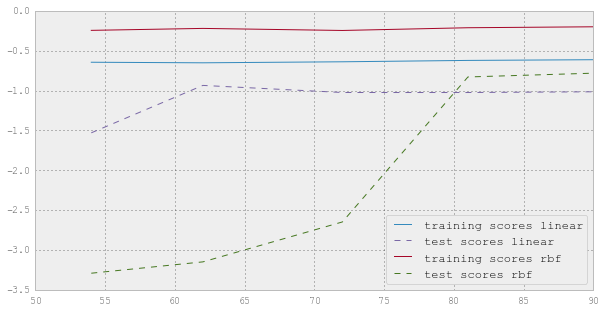

In [269]:
# качество на обучении и контроле
plt.rcParams['figure.figsize'] = 10, 5

from sklearn.learning_curve import learning_curve
from sklearn.svm import SVR


# This is actually negative MSE!
training_sizes, train_scores, test_scores = learning_curve(SVR(kernel='linear'), X, y, cv=10,
                                                           scoring="mean_squared_error",
                                                           train_sizes=[.6, .7, .8, .9, 1.])

training_sizes_2, train_scores_2, test_scores_2 = learning_curve(SVR(kernel='rbf'), X, y, cv=10,
                                                           scoring="mean_squared_error",
                                                           train_sizes=[.6, .7, .8, .9, 1.])

# Use the negative because we want to maximize score
print(train_scores.mean(axis=1))
plt.plot(training_sizes, train_scores.mean(axis=1), label="training scores linear", c='red')
plt.plot(training_sizes, test_scores.mean(axis=1), label="test scores linear", ls='--', c='red')
plt.plot(training_sizes_2, train_scores_2.mean(axis=1), label="training scores rbf", c='blue')
plt.plot(training_sizes_2, test_scores_2.mean(axis=1), label="test scores rbf", c='blue', ls='--')

plt.legend(loc='best')

###### Перебор параметров

In [261]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
cv = KFold(n=len(X), n_folds=5, shuffle=True)

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=3)

grid.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] gamma=0.001, C=0.001 ............................................
[CV] .................. gamma=0.001, C=0.001, score=-0.076544 -   0.0s
[CV] gamma=0.001, C=0.001 ............................................
[CV] .................. gamma=0.001, C=0.001, score=-0.001319 -   0.0s
[CV] gamma=0.001, C=0.001 ............................................
[CV] .................. gamma=0.001, C=0.001, score=-0.092747 -   0.0s
[CV] gamma=0.001, C=0.001 ............................................
[CV] .................. gamma=0.001, C=0.001, score=-0.054295 -   0.0s
[CV] gamma=0.001, C=0.001 ............................................
[CV] .................. gamma=0.001, C=0.001, score=-0.080761 -   0.0s
[CV] gamma=0.01, C=0.001 .............................................
[CV] ................... gamma=0.01, C=0.001, score=-0.073202 -   0.0s
[CV] gamma=0.01, C=0.001 .............................................
[CV] ..........

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  32 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished



[CV] ....................... gamma=0.01, C=10, score=0.865044 -   0.0s
[CV] gamma=0.01, C=10 ................................................
[CV] ....................... gamma=0.01, C=10, score=0.842806 -   0.0s
[CV] gamma=0.01, C=10 ................................................
[CV] ....................... gamma=0.01, C=10, score=0.601109 -   0.0s
[CV] gamma=0.01, C=10 ................................................
[CV] ....................... gamma=0.01, C=10, score=0.797406 -   0.0s
[CV] gamma=0.1, C=10 .................................................
[CV] ........................ gamma=0.1, C=10, score=0.842521 -   0.0s
[CV] gamma=0.1, C=10 .................................................
[CV] ........................ gamma=0.1, C=10, score=0.893957 -   0.0s
[CV] gamma=0.1, C=10 .................................................
[CV] ........................ gamma=0.1, C=10, score=0.887930 -   0.0s
[CV] gamma=0.1, C=10 .................................................
[CV] 

GridSearchCV(cv=sklearn.cross_validation.KFold(n=100, n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'gamma': [0.001, 0.01, 0.1, 1], 'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=3)

In [40]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.score(X_test, y_test))

0.958154154548
{'gamma': 1, 'C': 10}
0.963548256612


# Хэширование

In [185]:
from sklearn.utils.murmurhash import murmurhash3_bytes_u32

# encode for python 3 compatibility
for word in "the cat sat on the mat".encode("utf-8").split():
    print("{0} => {1}".format(
        word, murmurhash3_bytes_u32(word, 0) % 2 ** 20))

b'the' => 761698
b'cat' => 300839
b'sat' => 122804
b'on' => 735689
b'the' => 761698
b'mat' => 122997


In [187]:
from sklearn.feature_extraction.text import HashingVectorizer

h_vectorizer = HashingVectorizer(encoding='latin-1')
print(h_vectorizer)
analyzer = h_vectorizer.build_analyzer()
analyzer('This is a test sentence.')

HashingVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.float64'>, encoding='latin-1',
         input='content', lowercase=True, n_features=1048576,
         ngram_range=(1, 1), non_negative=False, norm='l2',
         preprocessor=None, stop_words=None, strip_accents=None,
         token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None)


['this', 'is', 'test', 'sentence']

In [190]:
 X_train_small = h_vectorizer.transform(['This is a test sentence.'])

In [191]:
X_train_small

<1x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

# Сохранение моделей

In [204]:
from sklearn import svm
from sklearn import datasets

clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)  

# первый способ
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0])

array([0])

In [205]:
# второй способ
from sklearn.externals import joblib
joblib.dump(clf, 'filename.pkl')
clf2 = joblib.load('filename.pkl')
clf2.predict(X[0])

array([0])